IMPORTS BEFORE RUNNING CODE BELOW

In [78]:
import tensorflow.keras.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
import linear_models.softmaxreg as softmaxreg
import umap
import matplotlib.pyplot as plt
import numpy as np
import metrics.metrics as metrics

TRAINING MODEL USING THE IMAGES

In [79]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print ('{} {}'.format(x_train.shape, x_train.dtype))
print ('{} {}'.format(x_test.shape, x_train.dtype))
digit = x_train[0,:,:]
print(digit.shape)

(60000, 28, 28) uint8
(10000, 28, 28) uint8
(28, 28)


In [80]:
#normalizamos/estandarizamos los datos
x_train_std = (x_train - x_train.mean()) / x_train.std()
x_test_std = (x_test - x_test.mean()) / x_test.std()

In [81]:
x_train_d_784 = x_train_std.reshape(60000,-1)
x_test_d_784 = x_test_std.reshape(10000,-1)

In [82]:
SM = softmaxreg.SoftmaxReg(10)

In [83]:
coeff = SM.fit(x_train_d_784, y_train)

it 0 acc 0.12515
it 10 acc 0.23818333333333333
it 20 acc 0.36823333333333336
it 30 acc 0.47168333333333334
it 40 acc 0.5447333333333333
it 50 acc 0.5956166666666667
it 60 acc 0.6341666666666667
it 70 acc 0.66365
it 80 acc 0.6865833333333333
it 90 acc 0.70525
it 100 acc 0.7195666666666667
it 110 acc 0.7324833333333334
it 120 acc 0.7434833333333334
it 130 acc 0.7531
it 140 acc 0.76235
it 150 acc 0.7693833333333333
it 160 acc 0.7758333333333334
it 170 acc 0.78185
it 180 acc 0.7875666666666666
it 190 acc 0.7926833333333333


In [84]:
y_pred = SM.predict(x_test_d_784)

In [85]:
acc = metrics.multiclass_accuracy(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.8098


In [86]:
cm = metrics.confusion_matrix(y_test, y_pred, 10)
print(f'Confusion Matrix\n{cm}')

Confusion Matrix
[[ 887    0   10   12    2   28   23    5   12    1]
 [   0 1075    5    6    1   11    5    2   30    0]
 [  22   18  795   35   26    6   36   16   62   16]
 [  20   12   33  806    1   61   11   17   26   23]
 [   3    7    5    4  809    9   28   12   16   89]
 [  32   18   18   64   38  593   25   11   60   33]
 [  20    8   26    2   15   36  837    3    9    2]
 [   9   23   32    8   19   11    0  849    9   68]
 [  13   20   38   54   27   66   18   13  696   29]
 [  16   11   11   15   75   29    3   81   17  751]]


- Number 0 precision: 0.9051020408163265
- Number 1 precision: 0.947136563876652
- Number 2 precision: 0.7703488372093024
- Number 3 precision: 0.7980198019801981
- Number 4 precision: 0.8238289205702648
- Number 5 precision: 0.6647982062780269
- Number 6 precision: 0.8736951983298539
- Number 7 precision: 0.8258754863813229
- Number 8 precision: 0.7145790554414785
- Number 9 precision: 0.7443012884043607


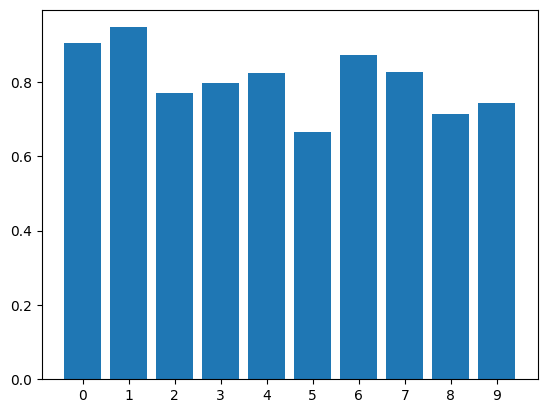

In [87]:
number = 0
results = []
for row in cm:
    results.append(cm[number][number]/sum(row))
    print(f'- Number {number} precision: {cm[number][number]/sum(row)}')
    number += 1
fig, ax = plt.subplots()
ax.bar([str(numero) for numero in range(10)], results)
plt.show()

UMAP
(60000, 2)


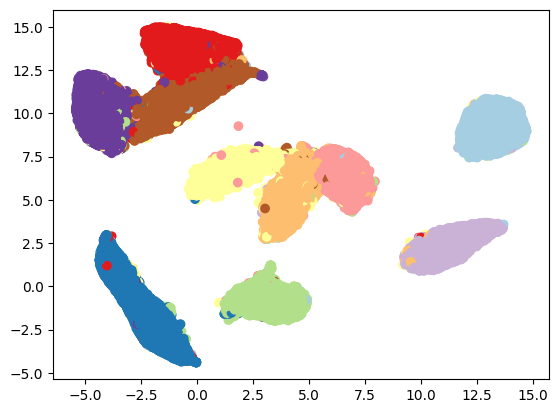

In [88]:
#2d visualization
reducer = umap.UMAP()
print('UMAP', flush = True)
reducer.fit(x_train_d_784) 
embedding = reducer.transform(x_train_d_784)
print(embedding.shape)
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_train, cmap='Paired')
plt.show()

TRAINING MODEL USING HOG FUNCTION

In [89]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print ('{} {}'.format(x_train.shape, x_train.dtype))
print ('{} {}'.format(x_test.shape, x_train.dtype))
digit = x_train[0,:,:]
print(digit.shape)

(60000, 28, 28) uint8
(10000, 28, 28) uint8
(28, 28)


In [90]:
#normalizamos/estandarizamos los datos
x_train_std = (x_train - x_train.mean()) / x_train.std()
x_test_std = (x_test - x_test.mean()) / x_test.std()
print(x_test_std.shape)
print(x_train_std.shape)

(10000, 28, 28)
(60000, 28, 28)


In [91]:
SM = softmaxreg.SoftmaxReg(10)

In [92]:
x_train_hog = list()
for n in range(len(x_train_std)):
    digit = x_train_std[n,:,:]
    fd = hog(digit, orientations=8, pixels_per_cell=(7,7), cells_per_block=(1, 1), visualize=False)
    x_train_hog.append(fd)
    if(n%9999 == 0): print(f"{round(n/len(x_train_std)*100)}%")
x_train_hog = np.array(x_train_hog)

0%
17%
33%
50%
67%
83%
100%


In [93]:
x_test_hog = list()
for n in range(len(x_test_std)):
    digit = x_test_std[n,:,:]
    fd = hog(digit, orientations=8, pixels_per_cell=(7,7), cells_per_block=(1, 1), visualize=False)
    x_test_hog.append(fd)
    if(n%999 == 0): print(f"{round(n/len(x_test_std)*100)}%")
x_test_hog = np.array(x_test_hog)

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%


In [94]:
coeff = SM.fit(x_train_hog, y_train)
y_pred = SM.predict(x_test_hog)

it 0 acc 0.0863
it 10 acc 0.08876666666666666
it 20 acc 0.09218333333333334
it 30 acc 0.0953
it 40 acc 0.09976666666666667
it 50 acc 0.10461666666666666
it 60 acc 0.11043333333333333
it 70 acc 0.11776666666666667
it 80 acc 0.1261
it 90 acc 0.13686666666666666
it 100 acc 0.148
it 110 acc 0.1601
it 120 acc 0.1734
it 130 acc 0.18763333333333335
it 140 acc 0.202
it 150 acc 0.2165
it 160 acc 0.23175
it 170 acc 0.24615
it 180 acc 0.26155
it 190 acc 0.27565


In [95]:
acc = metrics.multiclass_accuracy(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.291


In [96]:
cm = metrics.confusion_matrix(y_test, y_pred, 10)
print(f'Confusion Matrix\n{cm}')

Confusion Matrix
[[186  38 218 166  13   2 325  22   1   9]
 [  1 605 117   1  59   0  94   0 112 146]
 [ 91  17 346 158  25  14 225  67   3  86]
 [ 71  11 128 190  20  17 363  92   9 109]
 [ 59  93 173  21 240  15  86  18 144 133]
 [ 98   9  83 177  36  80 183  88 124  14]
 [ 33  16  79  28  17   2 742  10   7  24]
 [ 58  31 275  21  18   5   3 290  72 255]
 [ 78  34 150  91  47  15 403  37  86  33]
 [122  29 321  99  73  21  56  35 108 145]]


- Number 0 precision: 0.18979591836734694
- Number 1 precision: 0.5330396475770925
- Number 2 precision: 0.33527131782945735
- Number 3 precision: 0.18811881188118812
- Number 4 precision: 0.24439918533604887
- Number 5 precision: 0.08968609865470852
- Number 6 precision: 0.7745302713987474
- Number 7 precision: 0.2821011673151751
- Number 8 precision: 0.08829568788501027
- Number 9 precision: 0.14370664023785926


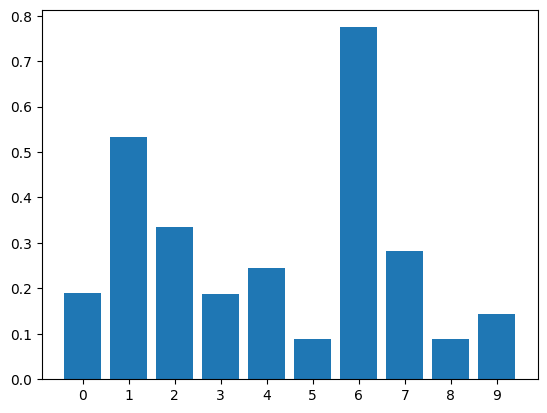

In [97]:
number = 0
results = []
for row in cm:
    results.append(cm[number][number]/sum(row))
    print(f'- Number {number} precision: {cm[number][number]/sum(row)}')
    number += 1
fig, ax = plt.subplots()
ax.bar([str(numero) for numero in range(10)], results)
plt.show()

UMAP
(60000, 2)


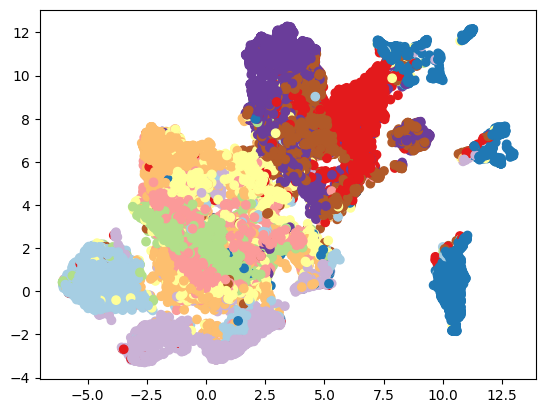

In [98]:
#2d visualization
reducer = umap.UMAP()
print('UMAP', flush = True)
reducer.fit(x_train_hog) 
embedding = reducer.transform(x_train_hog)
print(embedding.shape)
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_train, cmap='Paired')
plt.show()